<a href="https://colab.research.google.com/github/shubham-20120/customer-churn-prediction-using-ML/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

### importing data

In [4]:
df = pd.read_csv('/content/customer_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df = df.drop('customerID', axis=1)

### data preprocessing

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# checking for space error in TotalCharges
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [10]:
# removing data rows where TotalCharges == ' '
df = df[df.TotalCharges != ' ']

In [11]:
# changing string-numeric values to string
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [12]:
# printing unique values in each rows
for column in df:
    print(column, df[column].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   

In [13]:
# no services to 'No'
df.MultipleLines = df.MultipleLines.replace('No phone service', 'No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service', 'No')
df.OnlineBackup  = df.OnlineBackup.replace('No internet service', 'No')
df.TechSupport  = df.TechSupport.replace('No internet service', 'No')
df.StreamingTV  = df.StreamingTV.replace('No internet service', 'No')
df.StreamingMovies  = df.StreamingMovies.replace('No internet service', 'No')
df.DeviceProtection  = df.DeviceProtection.replace('No internet service', 'No')

In [14]:
# label-encoding
for column in df:
    if len(df[column].unique()) == 2:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [15]:
# one hot excoding of multiclass features
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [16]:
# again printing unique values in each rows
for column in df:
    print(column, df[column].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
PaperlessBilling [1 0]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]
InternetService_DSL [1 0]
InternetService_Fiber optic [0 1]
InternetService_No [0 1]
Contract_Month-to-month [1 0]
Contract_One year [0 1]
Contract_Two year [0 1]
PaymentMethod_Bank transfer (automatic) [0 1]
PaymentMethod_Credit card (automatic) [0 1]
PaymentMethod_Electronic check [1 0]
PaymentMethod_Mailed check [0 1]


In [17]:
# minmax scaling
scalingCols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[scalingCols] = scaler.fit_transform(df[scalingCols])

In [29]:
# spliting dataset into train-test-split
x = df.drop('Churn', axis=1)
y = df['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [30]:
df.shape, xtrain.shape, xtest.shape

((7032, 27), (4922, 26), (2110, 26))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

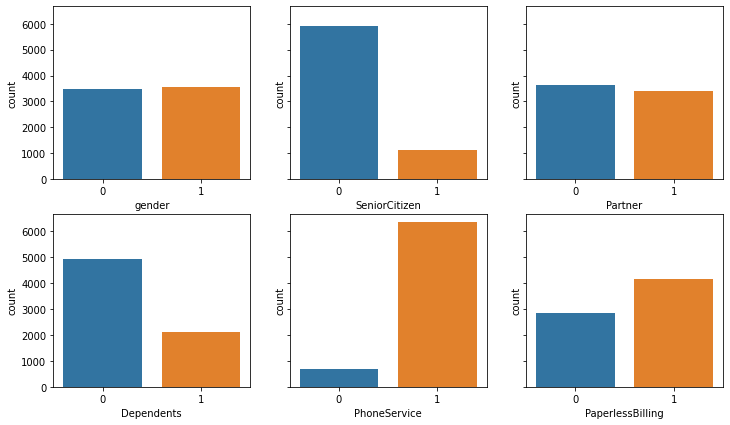

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

### running algorithms

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier()

dtModel.fit(xtrain, ytrain)

print(round(dtModel.score(xtest, ytest), 4) * 100, '%')

72.65 %


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier()

knnModel.fit(xtrain, ytrain)

print(round(knnModel.score(xtest, ytest), 4) * 100, '%')

75.73 %


In [33]:
from tensorflow import keras

In [48]:
annModel = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='tanh')
])

annModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

annModel.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
154/154 [==============================] - 1s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 2/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 3/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 5/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 6/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 7/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 8/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 9/20
154/154 [==============================] - 0s 1ms/step - loss: 3.2358e-08 - accuracy: 0.7286
Epoch 10/20
154/154 [==============================] - 0s 1ms/st

In [88]:
print('Accuracy: ', round(annModel.evaluate(xtest, ytest)[1], 4)*100, '%')

66/66 [==============================] - 0s 963us/step - loss: 3.0113e-08 - accuracy: 0.7474
Accuracy:  74.74 %
